In [22]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, TargetEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek




from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, chi2, mutual_info_classif, f_classif, RFE, RFECV
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier


from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score
from imblearn.metrics import classification_report_imbalanced
import optuna


In [61]:
df_train = pq.read_table(r'C:\Users\t\Downloads\hakaton_2024-20240409T123908Z-001\hakaton_2024\train\ids_target.parquet.fastparquet').to_pandas().set_index('id')
df_test = pq.read_table(r'C:\Users\t\Downloads\hakaton_2024-20240409T123908Z-001\hakaton_2024\test\test\ids_target.parquet.fastparquet').to_pandas().set_index('id')

In [62]:
feature_file_names_test_2=[
"test\\test\prelead_features_user_info.parquet.fastparquet",
"test\\test\prelead_features_time_features.parquet.fastparquet",
"test\\test\prelead_features_revenue.parquet.fastparquet",
"test\\test\prelead_features_holding.parquet.fastparquet",
"test\\test\prelead_features_goszakupki.parquet.fastparquet",
"test\\test\prelead_features_egrul.parquet.fastparquet",
"test\\test\prelead_features_contractors_directional.parquet.fastparquet",
"test\\test\prelead_features_contractors_banks.parquet.fastparquet",
"test\\test\prelead_features_client_history.parquet.fastparquet",
"test\\test\prelead_features_client_gender.parquet.fastparquet"
]

feature_file_names_test2=[]
for i in feature_file_names_test_2:
    feature_file_names_test2.append(r'C:\Users\t\Downloads\hakaton_2024-20240409T123908Z-001\hakaton_2024\\'+ i)

feature_file_names_train2=[]
feature_file_names_train_2=[
"train\prelead_features_user_info.parquet.fastparquet",
"train\prelead_features_time_features.parquet.fastparquet",
"train\prelead_features_revenue.parquet.fastparquet",
"train\prelead_features_holding.parquet.fastparquet",
"train\prelead_features_goszakupki.parquet.fastparquet",
"train\prelead_features_egrul.parquet.fastparquet",
"train\prelead_features_contractors_directional.parquet.fastparquet",
"train\prelead_features_contractors_banks.parquet.fastparquet",
"train\prelead_features_client_history.parquet.fastparquet",
"train\prelead_features_client_gender.parquet.fastparquet"
]
for i in feature_file_names_train_2:
    feature_file_names_train2.append(r'C:\Users\t\Downloads\hakaton_2024-20240409T123908Z-001\hakaton_2024\\'+ i)


In [63]:
for file in feature_file_names_train2:
    data = pq.read_table(file).to_pandas().set_index('id')
    df_train = df_train.join(data)
#     print(1)
    
for file in feature_file_names_test2:
    data = pq.read_table(file).to_pandas().set_index('id')
    df_test = df_test.join(data)
#     print(2)

In [64]:
df_train

,timestamp,client_id,seller_id,target,role,division,position,grade,is_teamlead,teamid,...,tochka_contractors_n_outgoing,tochka_contractors_count_sum_rub_outgoing,tochka_contractors_avg_sum_rub_outgoing,tochka_contractor_bank_top_1,days_since_last_take,wrong_phone_last_time,has_new_phones,cnt_takes,cnt_not_sell,client_gender
id,,,,,,,,,,,,,,,,,,,,,
f90c6b1c-37fa-4e0d-bdb9-bd332180f7cf,2020-06-22 00:00:00,7390515e-26ff-4ece-9276-3aeffd159150,241c7f98-838c-461e-84f6-653f8ee380d7,0,role_5,division_12,position_5,grade_12,False,1f16db72-ccb7-4db5-abd6-a8c0d14239eb,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown
8bd5070f-541a-4acf-99b7-aad83db4ffa9,2023-05-02 20:00:00,8c2ad13a-90bd-414a-86bf-73c97e76e91c,c7aa6d84-ffa9-4122-b662-cfe09d48119e,0,role_9,division_1,position_51,grade_0,False,57d5e17c-80ce-47cd-921b-ced9fdae0655,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown
0f57961f-677c-4fb6-95bb-1de6903476b7,2022-11-08 16:00:00,2f5d044d-5d43-4ad4-a53b-2d1e100bfc52,3eeb1798-423b-4306-8017-b49c31a1164d,0,role_9,division_8,unknown,grade_18,False,f0a7636d-a0f4-422e-94bc-a1839d8c3b02,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown
16b48e53-7a87-4916-800e-4c5ac5500262,2022-10-06 15:00:00,cce566a9-1f83-4804-a7d9-94fe17618702,3eeb1798-423b-4306-8017-b49c31a1164d,0,role_9,division_8,unknown,grade_18,False,f0a7636d-a0f4-422e-94bc-a1839d8c3b02,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown
df06c1d2-3601-4d8b-8209-1e3dbb4d80e3,2023-06-21 19:00:00,11d777ac-58cc-4059-8d53-e8fc9287d143,668adc51-6344-476d-a8c3-568ff0efcf57,0,role_3,division_8,unknown,unknown,False,95f82126-a39f-4c16-b452-998c43709af6,...,1 - 5,10 - 100,< 10000,bank_388,9999,False,True,1,0,женщина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
da6811dc-397d-44f1-97ac-1ffdd5e6fb19,2023-06-22 20:00:00,1c40143d-bbc8-40ba-8499-837675f47bcc,43d60f6a-195f-4b6e-98a5-6ea407c15c4d,1,role_5,division_1,position_51,grade_10,False,977eabdf-d51c-4c85-b17a-c649938d427e,...,1 - 5,5 - 10,100000 - 1000000,bank_265,9999,False,True,1,0,unknown
891fc2f2-9ea5-4db6-a10e-f31b89cea89f,2022-10-19 20:00:00,652adc67-43e2-4654-928d-b188cbf27353,d9731dc4-5c2d-4a72-8ac9-2eb6f34414d3,1,role_9,division_8,unknown,grade_10,False,03d206ee-f42e-4ff0-8a41-65db731e7ff7,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown
da166aff-7a8d-4f9e-bb59-3dba58c8b33c,2023-03-01 21:00:00,6c347b8c-dace-4efe-800b-92a4197b060e,47ff5ed1-f7b9-4c29-b8bf-a502b35bc0d8,1,role_9,division_8,position_22,grade_0,False,f0a7636d-a0f4-422e-94bc-a1839d8c3b02,...,0,0,< 10000,unknown,9999,False,True,1,0,unknown


## генерация фичей

In [65]:
df_train['time_since_last'] = df_train.sort_values(by=['client_id','timestamp']).groupby('client_id')['timestamp'].diff()  / np.timedelta64(1, 'h')
df_test['time_since_last'] = df_test.sort_values(by=['client_id','timestamp']).groupby('client_id')['timestamp'].diff()  / np.timedelta64(1, 'h')
df_train['client_seller_gender_match'] = (df_train['seller_gender'] == df_train['client_gender']).astype(int)
df_test['client_seller_gender_match'] = (df_test['seller_gender'] == df_test['client_gender']).astype(int)

df = pd.concat([df_train, df_test])

df_train['bank_265'] = np.where(df_train['tochka_contractor_bank_top_1']=='bank_265', True, False)
df_test['bank_265'] = np.where(df_test['tochka_contractor_bank_top_1']=='bank_265', True, False)

df_test['client_visits'] = df.groupby('client_id')['client_id'].transform('count').iloc[1021094:]
df_train['client_visits'] = df.groupby('client_id')['client_id'].transform('count').iloc[:1021094]

df_test['client_visits'] = np.where(df_test['client_visits'] > 7, 7, df_test['client_visits'] ).astype(str)
df_train['client_visits'] = np.where(df_train['client_visits'] > 7, 7, df_train['client_visits'] ).astype(str)

df_test['seller_count'] = df.groupby('seller_id')['seller_id'].transform('count').iloc[1021094:]
df_train['seller_count'] = df.groupby('seller_id')['seller_id'].transform('count').iloc[:1021094]

df_test['seller_id'] = np.where(df_test['seller_id'].isin(list(df['seller_id'].value_counts().tail(2328-542).index)), 'other_seller', df_test['seller_id'] )
df_train['seller_id'] = np.where(df_train['seller_id'].isin(list(df['seller_id'].value_counts().tail(2328-542).index)), 'other_seller', df_train['seller_id'] )


In [66]:
def get_time_feature(df, col, keep=False):
    
    df_copy = df.copy()
    prefix = col + "_"
    df_copy[col] = pd.to_datetime(df_copy[col])
    df_copy[prefix + 'hour'] = df_copy[col].dt.hour
    # df_copy['is_night'] = df_copy[prefix + 'hour'] < 7
    df_copy[prefix + 'month'] = df_copy[col].dt.month.astype(str)

    df_copy[prefix + 'dayofweek'] = df_copy[col].dt.day_name()
    if keep: return df_copy
    else: return df_copy.drop([col], axis=1)    

df_train = get_time_feature(df_train, "timestamp")
df_test = get_time_feature(df_test, "timestamp")


In [67]:
df_test = df_test.drop([
    'client_id',
    "tochka_contractor_bank_top_1",
    'egrul_region',
], axis=1)

df_train = df_train.drop([
    'client_id',
    "tochka_contractor_bank_top_1",
    'egrul_region',
], axis=1)

In [68]:
cat_features = []
for i in df_train.columns:
    if df_train[i].dtype=='object' or df_train[i].dtype=='bool':
        cat_features.append(i)

num_features =[i for i in df_train.columns if i not in cat_features and i != 'target']
num_features

['employed_days',
 'time_tz_diff',
 'holding_cnt_takes',
 'holding_cnt_not_sell',
 'days_since_last_take',
 'cnt_takes',
 'cnt_not_sell',
 'time_since_last',
 'client_seller_gender_match',
 'seller_count',
 'timestamp_hour']

In [69]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('target', axis=1), df_train['target'], test_size=0.3, random_state=42, stratify=df_train['target'])

In [70]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
          
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", min_frequency=600)),
        # ("encoder", TargetEncoder(random_state=1)),
        ("selector", SelectPercentile(chi2, percentile=80)),

    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)


In [71]:
X_train_new = preprocessor.fit_transform(X_train, y_train)
X_val_new = preprocessor.transform(X_val)


In [72]:
lgb_params = {'max_depth': 37, 'lambda_l1': 0.0018218770925443942, 'lambda_l2': 2.4384099481747112, 'num_leaves': 43, 'feature_fraction': 0.684446002245438, 'bagging_fraction': 0.911398841762359, 'bagging_freq': 1, 'min_child_samples': 100}

lgb_params = {'max_depth': 54, 'lambda_l1': 1.1709285956391536e-06, 'lambda_l2': 0.06276004286605638, 'num_leaves': 77, 'feature_fraction': 0.9687161610164512, 'bagging_fraction': 0.8000334493075482, 'bagging_freq': 1, 'min_child_samples': 10}

# lgb_params = {'max_depth': 42, 'lambda_l1': 1.503968593279178e-07, 'lambda_l2': 4.59844758999243e-08, 'num_leaves': 116, 'feature_fraction': 0.774356378428359, 'bagging_fraction': 0.9861997155935318, 'bagging_freq': 2, 'min_child_samples': 7}
model_lgb = LGBMClassifier(**lgb_params, verbose=-1, random_state=42, importance_type='gain',        )

model = EasyEnsembleClassifier( estimator=model_lgb, n_estimators=70, 
                                     random_state=1, 
                                     
                                     )

model.fit(X_train_new, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


EasyEnsembleClassifier(estimator=LGBMClassifier(bagging_fraction=0.8000334493075482,
                                                bagging_freq=1,
                                                feature_fraction=0.9687161610164512,
                                                importance_type='gain',
                                                lambda_l1=1.1709285956391536e-06,
                                                lambda_l2=0.06276004286605638,
                                                max_depth=54,
                                                min_child_samples=10,
                                                num_leaves=77, random_state=42,
                                                verbose=-1),
                       n_estimators=70, random_state=1)

In [73]:
X = df_train.drop('target', axis=1)
y = df_train['target']


X_full_new = preprocessor.fit_transform(X, y)
X_test_new = preprocessor.transform(df_test)

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = {'f1':[], "auc": [], "th": []}

for train_index, test_index in skf.split(X_full_new, y):
    X_train_cv, X_test_cv = X_full_new[train_index], X_full_new[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    model.fit(X_train_cv, y_train_cv)
    preds_proba = model.predict_proba(X_test_cv)[:,1]

    auc = roc_auc_score(y_test_cv, preds_proba)
    # print(auc)
    precision, recall, thresholds = precision_recall_curve(y_test_cv, preds_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = pd.Series(f1_scores).dropna()
    threshold = thresholds[np.argmax(f1_scores)]
    y_pred = (preds_proba >= threshold).astype(int)

    f = f1_score(y_test_cv, y_pred)
    metrics['f1'].append(f)
    metrics['auc'].append(auc)
    metrics['th'].append(threshold)

print('f', np.mean(metrics['f1']))
print('auc', np.mean(metrics['auc']))

C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_test_cv = y[train_index], y[test_index]


[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:15: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_test_cv = y[train_index], y[test_index]


[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_test_cv = y[train_index], y[test_index]


[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:15: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_test_cv = y[train_index], y[test_index]


[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\t\AppData\Local\Temp\ipykernel_15988\2844262562.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_cv, y_test_cv = y[train_index], y[test_index]


[LightGBM] [Warning] feature_fraction is set=0.9687161610164512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687161610164512
[LightGBM] [Warning] lambda_l1 is set=1.1709285956391536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1709285956391536e-06
[LightGBM] [Warning] bagging_fraction is set=0.8000334493075482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8000334493075482
[LightGBM] [Warning] lambda_l2 is set=0.06276004286605638, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06276004286605638
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
f 0.13342422266555226
auc 0.8435842337877613


In [15]:
preds_proba = model.predict_proba(X_val_new)[:,1]
auc = roc_auc_score(y_val, preds_proba)
print(auc)
precision, recall, thresholds = precision_recall_curve(y_val, preds_proba)


0.8445714777684634


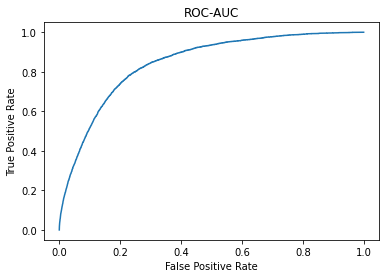

In [21]:
lr_fpr, lr_tpr, _ = roc_curve(y_val, preds_proba)

plt.plot(lr_fpr, lr_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.show()

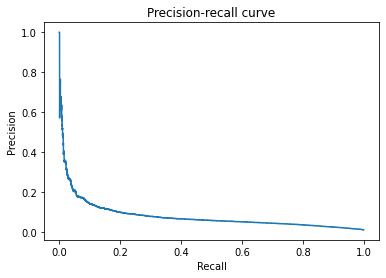

In [19]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve');

## подбор гиперпарметров

In [ ]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "verbosity": -1,
        "max_depth": trial.suggest_int("max_depth", 5, 70),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 150),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = LGBMClassifier(**param,random_state=42)
    model = EasyEnsembleClassifier( estimator=gbm, n_estimators=5, 
                                     random_state=1)

    model.fit(X_train_new, y_train)
    preds = model.predict_proba(X_val_new)[:,1]
    results = roc_auc_score(y_val, preds)
    
    
    return results

# study = optuna.create_study(study_name="lightgbm", direction="maximize")
# study.optimize(objective, n_trials=100)

## результат

In [20]:
X = df_train.drop('target', axis=1)
y = df_train['target']


X_full_new = preprocessor.fit_transform(X, y)
X_test_new = preprocessor.transform(df_test)

In [74]:
model.fit(X_full_new, y)

EasyEnsembleClassifier(estimator=LGBMClassifier(bagging_fraction=0.8000334493075482,
                                                bagging_freq=1,
                                                feature_fraction=0.9687161610164512,
                                                importance_type='gain',
                                                lambda_l1=1.1709285956391536e-06,
                                                lambda_l2=0.06276004286605638,
                                                max_depth=54,
                                                min_child_samples=10,
                                                num_leaves=77, random_state=42,
                                                verbose=-1),
                       n_estimators=70, random_state=1)

In [75]:
preds = model.predict_proba(X_test_new)[:,1]

In [76]:
y_pred = (preds >= 0.85538).astype(int)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [77]:
subm = pd.read_csv(r'C:\Users\t\Downloads\hakaton_2024-20240409T123908Z-001\hakaton_2024\sample_submission.csv')
subm
subm['target'] = y_pred
subm.to_csv('subm_01.csv', index=False)
subm

,id,target
0,21ea07a7-4c9c-4b9a-b0ae-921e7e562312,0
1,63f622c9-e4f6-4ec1-bb92-c551296ea8e9,0
2,c26e5b5e-f56d-48aa-89dc-711af7f9510e,0
3,7d7cc2bf-e392-4f6b-af76-b2cef6a2d5b2,0
4,e638d6ed-4522-4e39-aedf-3db5ea68d185,0
...,...,...
340359,4f76e63d-7fdc-4004-929e-927e93d7db9e,0
340360,363e9d8d-03de-4fc9-80b8-231619e1fe3e,0
340361,adfab3f7-1cd4-471f-83fa-7cab85f1ff37,0
340362,25eccd26-f154-4099-aa02-4e2737d69d04,0
